In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, recall_score, precision_score,classification_report,confusion_matrix,accuracy_score

In [2]:
df = pd.read_csv('super_sms_dataset.csv',encoding='ISO-8859-1')

In [3]:
df.sample(10)

,SMSes,Labels
5125,i find u at train tail?,0.0
11678,Hi Fiona It 's John from Victorian Liberal Lea...,1.0
34965,Me u Beekee and maybe fang? Eugene says he's s...,0.0
54438,Yes please,0.0
54913,"Not gonna lie, I'm feeling a bit nervous. ??",0.0
51574,YOUR WHATS APP NO HAS WON RS X CRORE XX LAKH I...,1.0
7861,I am already here,0.0
43855,Whatever turns u on... as long as I can have m...,0.0
30774,"Orh! Love my yeiyei too""!",0.0
31222,Hey gimme a call when you get a chance.,0.0


In [5]:
df = df.dropna(subset=['Labels'])


# Convert the 'Labels' column from float to int
df.loc[:,'Labels'] = df['Labels'].astype(int)

# Now you can use the updated DataFrame as needed
print(df.head())


                                               SMSes  Labels
0  There be an update for your delivery CC 017281...       1
1  watch your favorite english movies of all genr...       1
2                     aur what is the status for fms       0
3  hi shalini sundi thank you for dialling  speci...       1
4                       m tryin to understand too...       0


In [6]:
df.shape

(67008, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67008 entries, 0 to 67009
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SMSes   67008 non-null  object
 1   Labels  67008 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 1.3+ MB


In [8]:
df.isnull().sum()

SMSes     0
Labels    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.shape

(67008, 2)

In [12]:
df['Labels'].value_counts()

0    40830
1    26178
Name: Labels, dtype: int64

In [13]:
# Fill NaN values with an empty string
df['SMSes'] = df['SMSes'].fillna('')

# Convert all values in the 'SMSes' column to strings
df['SMSes'] = df['SMSes'].astype(str)
print(df.head())

                                               SMSes  Labels
0  There be an update for your delivery CC 017281...       1
1  watch your favorite english movies of all genr...       1
2                     aur what is the status for fms       0
3  hi shalini sundi thank you for dialling  speci...       1
4                       m tryin to understand too...       0


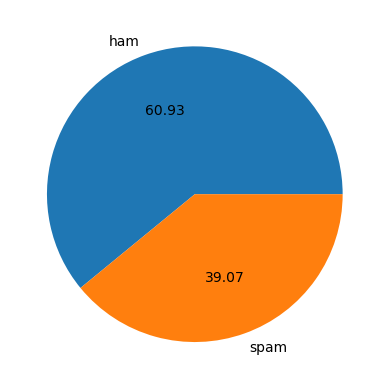

<Figure size 2000x2000 with 0 Axes>

In [14]:
plt.pie(df['Labels'].value_counts(), labels = ['ham','spam'],autopct="%0.2f")
plt.figure(figsize=(20,20))
plt.show()

In [15]:
import nltk

df['num_characters'] = df['SMSes'].apply(len)

In [16]:
df['num_words'] = df['SMSes'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df['num_sentences'] = df['SMSes'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
df.head(5)

,SMSes,Labels,num_characters,num_words,num_sentences
0,There be an update for your delivery CC 017281...,1,93,16,1
1,watch your favorite english movies of all genr...,1,146,26,1
2,aur what is the status for fms,0,30,7,1
3,hi shalini sundi thank you for dialling speci...,1,112,21,1
4,m tryin to understand too...,0,28,6,1


In [19]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,67008.000000,67008.000000,67008.000000
mean,96.095347,19.332483,1.626283
std,68.756854,12.880638,1.162588
min,2.000000,1.000000,1.000000
25%,42.000000,10.000000,1.000000
50%,89.000000,18.000000,1.000000
75%,136.000000,25.000000,2.000000
max,2695.000000,528.000000,38.000000


In [20]:
df[df['Labels'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,40830.000000,40830.000000,40830.000000
mean,65.190252,15.851531,1.908670
std,56.576727,13.112047,1.319146
min,2.000000,1.000000,1.000000
25%,30.000000,8.000000,1.000000
50%,50.000000,12.000000,2.000000
75%,81.000000,20.000000,2.000000
max,1474.000000,343.000000,38.000000


In [21]:
df[df['Labels'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,26178.000000,26178.000000,26178.000000
mean,144.298228,24.761747,1.185843
std,57.405188,10.399891,0.653666
min,19.000000,3.000000,1.000000
25%,121.000000,20.000000,1.000000
50%,136.000000,23.000000,1.000000
75%,150.000000,27.000000,1.000000
max,2695.000000,528.000000,10.000000


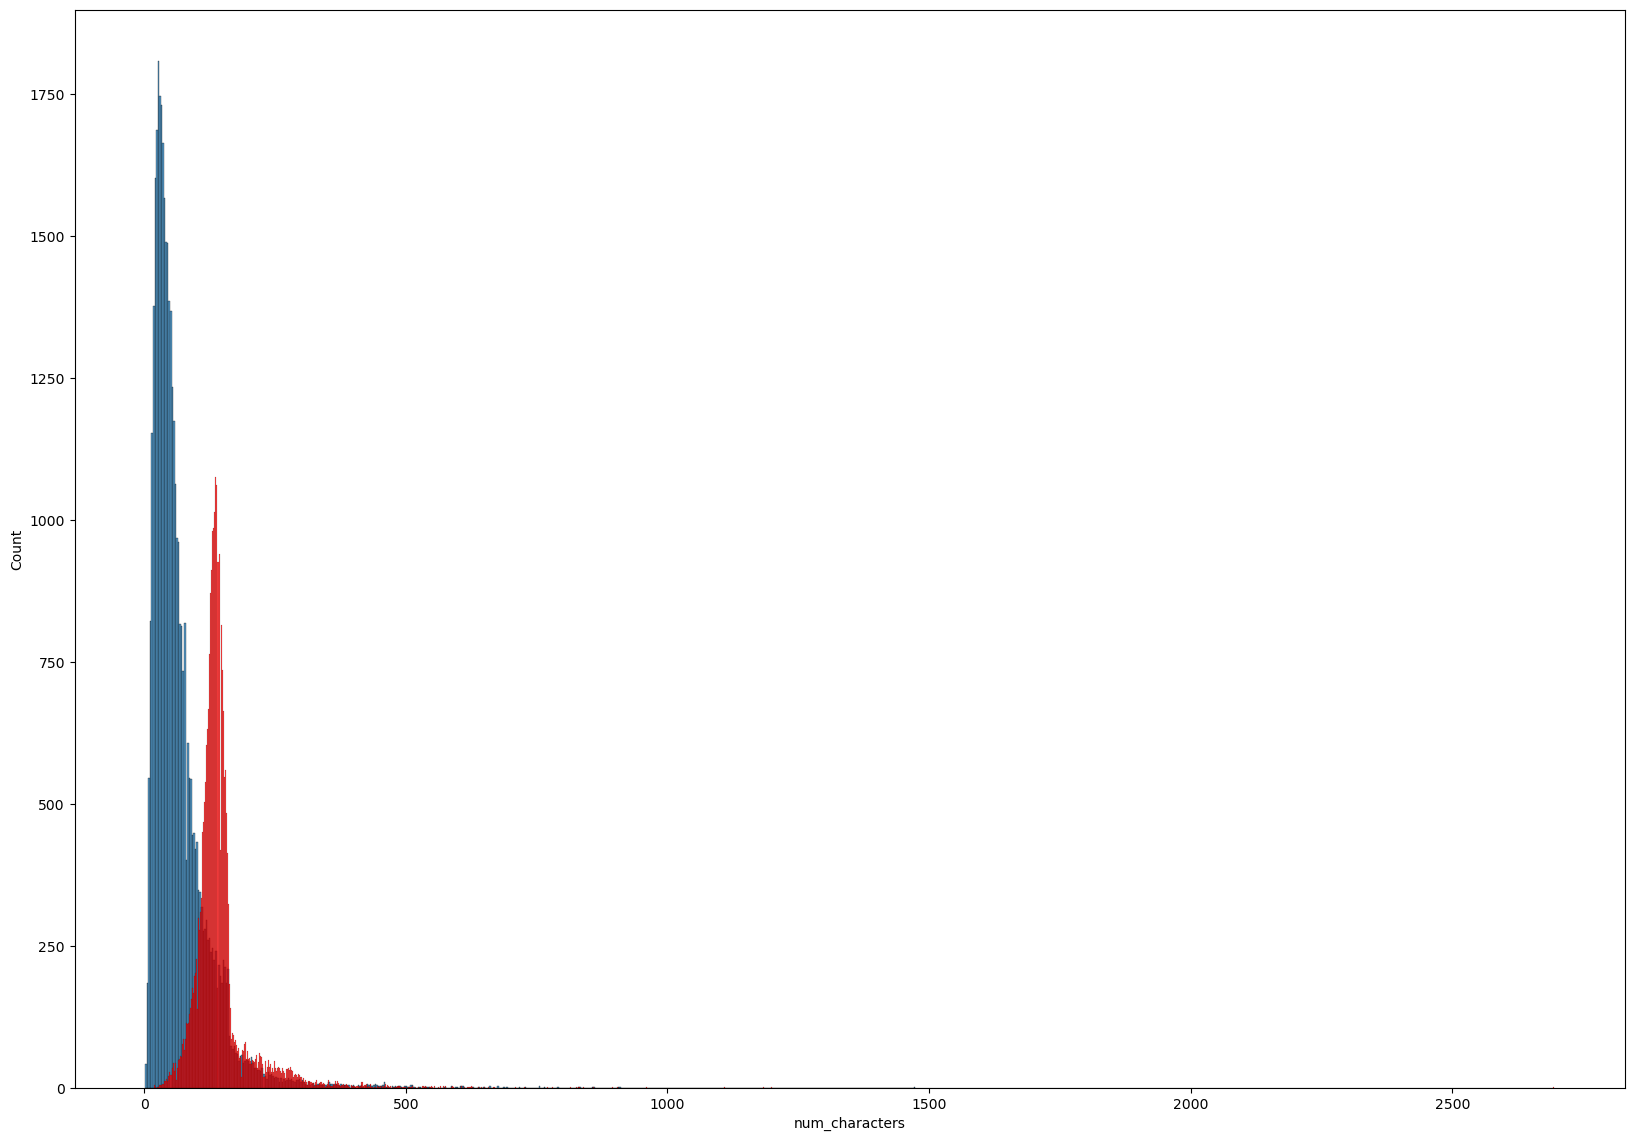

In [22]:
import seaborn as sns
plt.figure(figsize=(20,14))
sns.histplot(df[df['Labels'] == 0]['num_characters'])
sns.histplot(df[df['Labels'] == 1]['num_characters'],color='red')
plt.show()

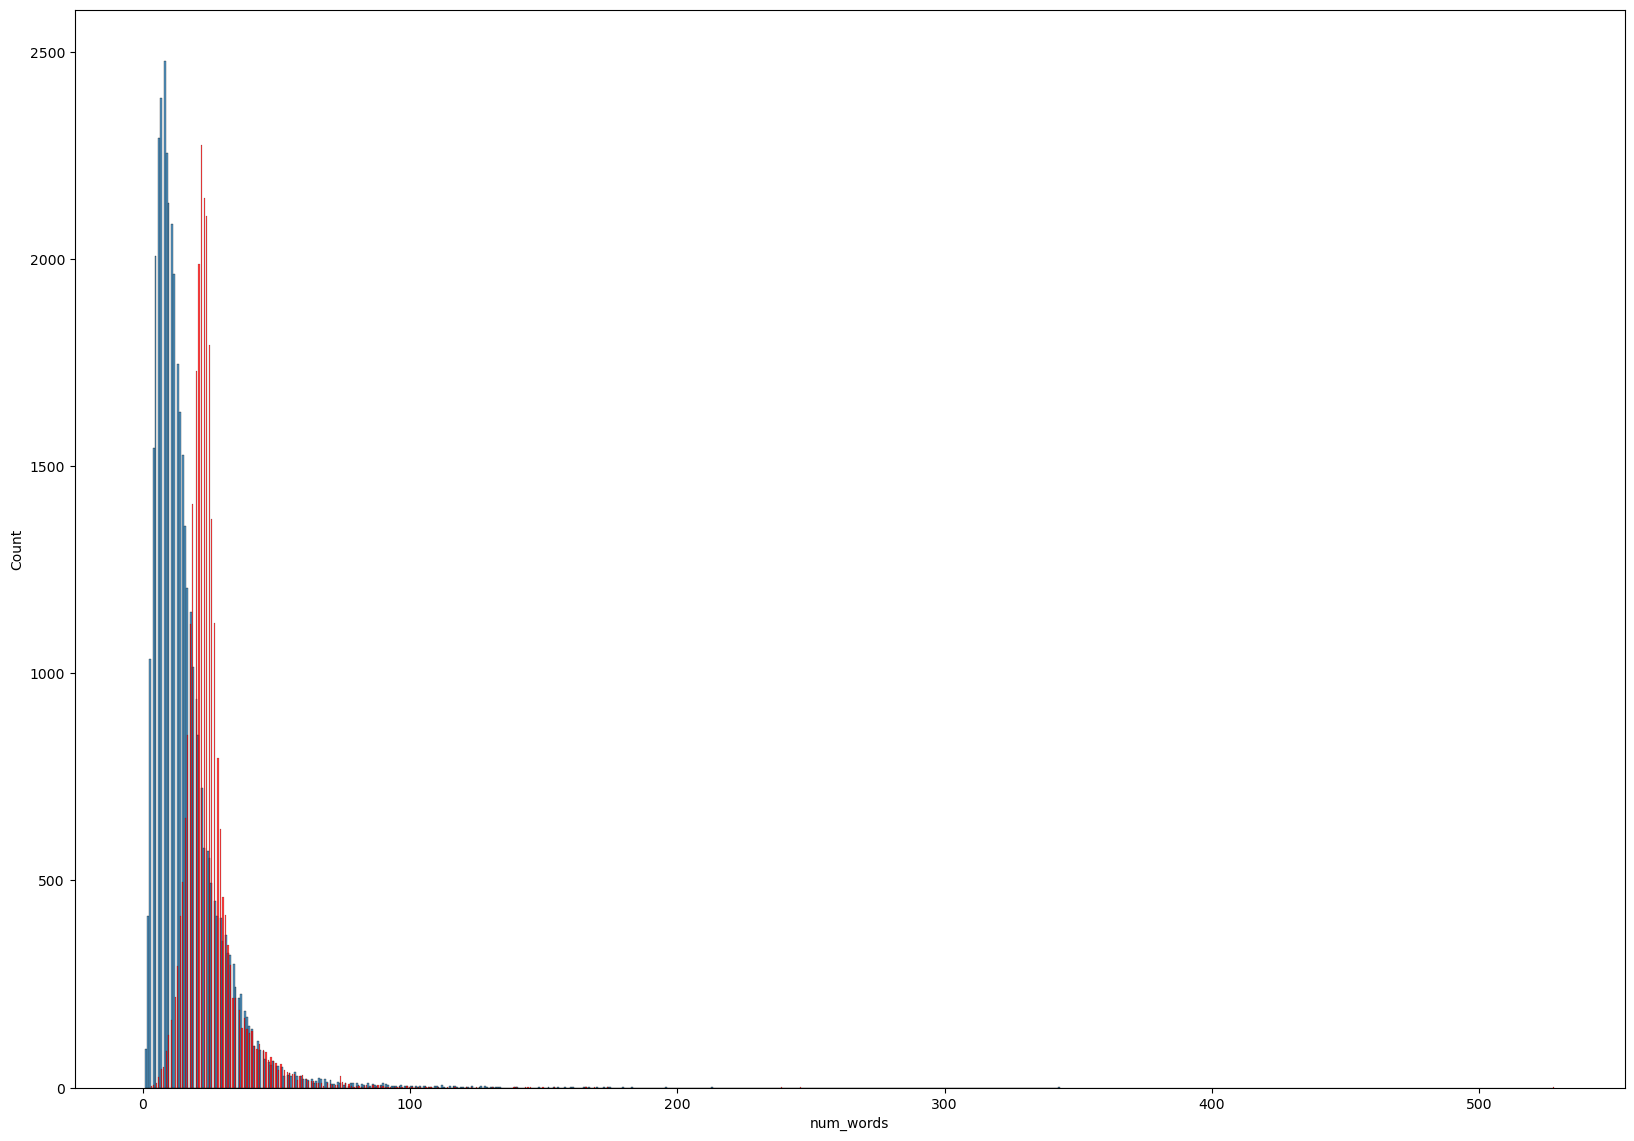

In [23]:
plt.figure(figsize=(20,14))
sns.histplot(df[df['Labels'] == 0]['num_words'])
sns.histplot(df[df['Labels'] == 1]['num_words'],color='red')
plt.show()

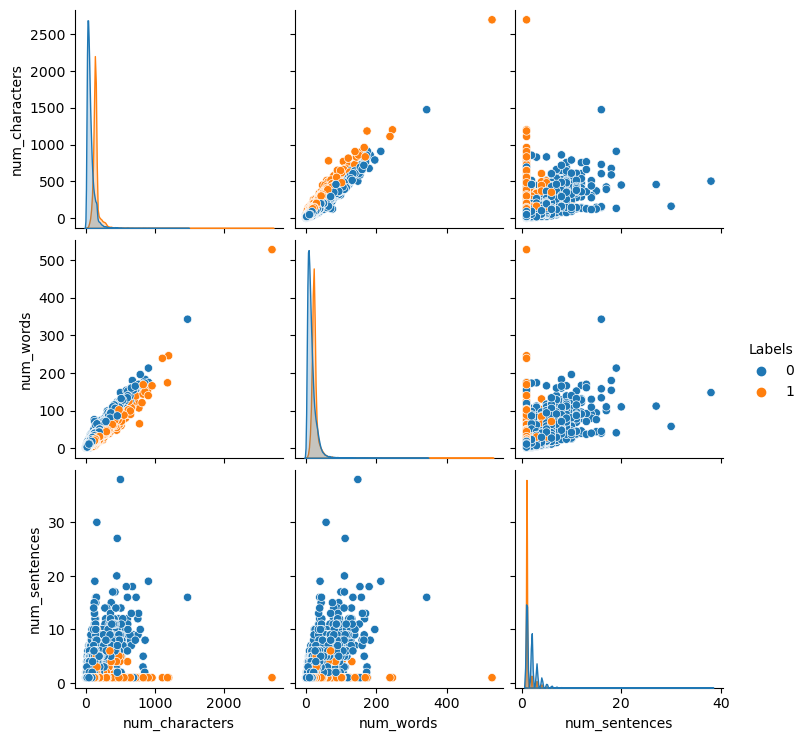

In [24]:
sns.pairplot(df,hue='Labels')
plt.show()

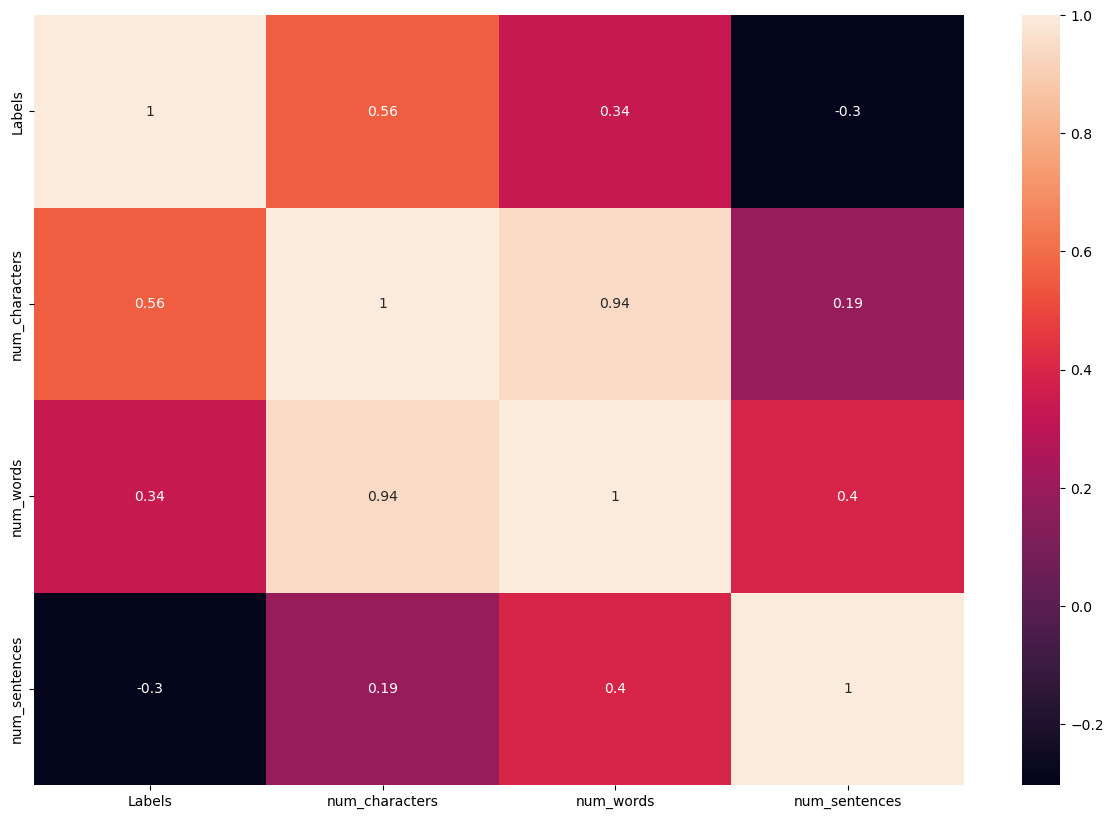

In [25]:
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [26]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import string

lemmatizer = WordNetLemmatizer()

def transform_text(text):
    text = text.lower() #Lowercasing Text
    text = nltk.word_tokenize(text) #Tokenization
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(lemmatizer.lemmatize(i))  # Applying lemmatizer
    
    return " ".join(y)


In [27]:
df['preprocessed_text'] = df['SMSes'].apply(transform_text)

In [28]:
df.head(10)

,SMSes,Labels,num_characters,num_words,num_sentences,preprocessed_text
0,There be an update for your delivery CC 017281...,1,93,16,1,update delivery cc 01728161e due tap http
1,watch your favorite english movies of all genr...,1,146,26,1,watch favorite english movie genre like fast f...
2,aur what is the status for fms,0,30,7,1,aur status fm
3,hi shalini sundi thank you for dialling speci...,1,112,21,1,hi shalini sundi thank dialling special offer ...
4,m tryin to understand too...,0,28,6,1,tryin understand
5,vip number for sale rs cont kumar,1,37,7,1,vip number sale r cont kumar
6,Hee. Muacks. Love u dear!,0,25,8,3,hee muacks love u dear
7,This be a reminder that your package will be d...,1,96,19,1,reminder package deliver receive 57 pending am...
8,Whoops let me convert it,0,24,5,1,whoop let convert
9,whats going on mate ?,0,21,5,1,whats going mate


In [29]:
spam_corpus = []
for msg in df[df['Labels'] == 1]['preprocessed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [29]:
from collections import Counter

# Assuming spam_corpus is a list of words
word_counts = Counter(spam_corpus)

# Get the 30 most common words
most_common_words = word_counts.most_common(30)

# Print each word with its frequency
for word, freq in most_common_words:
    print(f"{word}: {freq}")


get: 8052
r: 7661
http: 5696
offer: 5491
call: 5121
free: 4667
dear: 3791
please: 3369
click: 3305
customer: 2946
day: 2935
app: 2865
account: 2707
valid: 2472
today: 2260
download: 2245
card: 2159
apply: 2112
visit: 2019
xx: 1999
till: 1998
flat: 1902
use: 1870
tc: 1870
link: 1869
sm: 1860
code: 1769
update: 1658
new: 1625
order: 1622


In [30]:
len(spam_corpus)

428389

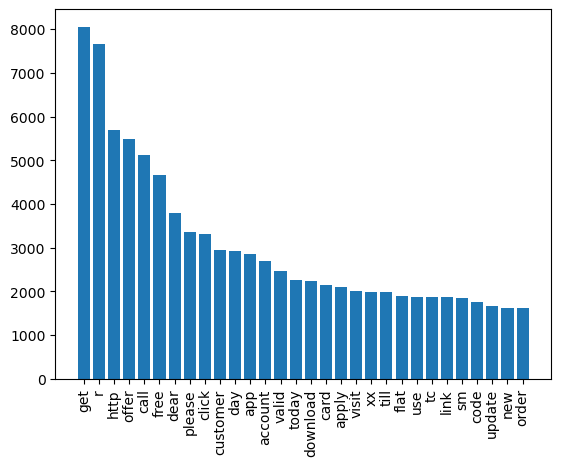

<Figure size 3000x2000 with 0 Axes>

In [31]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.figure(figsize=(30,20))
plt.show()

In [32]:
ham_corpus = []
for msg in df[df['Labels'] == 0]['preprocessed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [33]:
len(ham_corpus)

320163

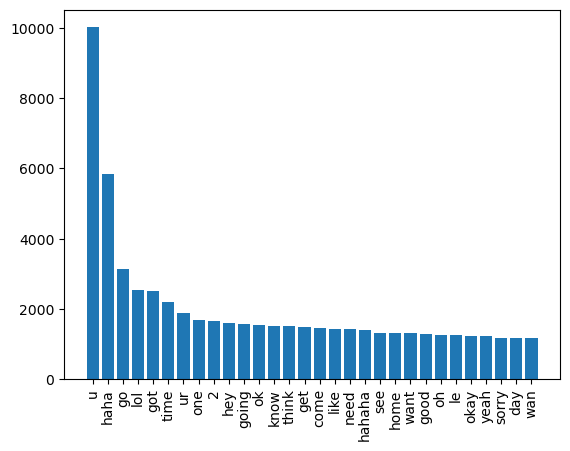

In [34]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
def save_corpora(spam_corpus, ham_corpus):
    """Save existing spam and ham corpora to files"""
    try:
        # Convert lists to space-separated strings
        spam_text = ' '.join(spam_corpus)
        ham_text = ' '.join(ham_corpus)
        
        # Save to files
        with open('spam_corpus.txt', 'w', encoding='utf-8') as f:
            f.write(spam_text)
        
        with open('ham_corpus.txt', 'w', encoding='utf-8') as f:
            f.write(ham_text)
            
        return True
    except Exception as e:
        print(f"Error saving corpora: {e}")
        return False

# Usage
save_corpora(spam_corpus, ham_corpus)

True

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['preprocessed_text']).toarray()

In [36]:
X.shape

(67008, 3000)

In [37]:
y = df['Labels'].values

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
#import imblearn
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert to DataFrame if needed
df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote, columns=['Labels'])], axis=1)


In [40]:
df_smote

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
57140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
57141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
57142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [42]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

[[11636   622]
 [  356  7489]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     12258
           1       0.92      0.95      0.94      7845

    accuracy                           0.95     20103
   macro avg       0.95      0.95      0.95     20103
weighted avg       0.95      0.95      0.95     20103



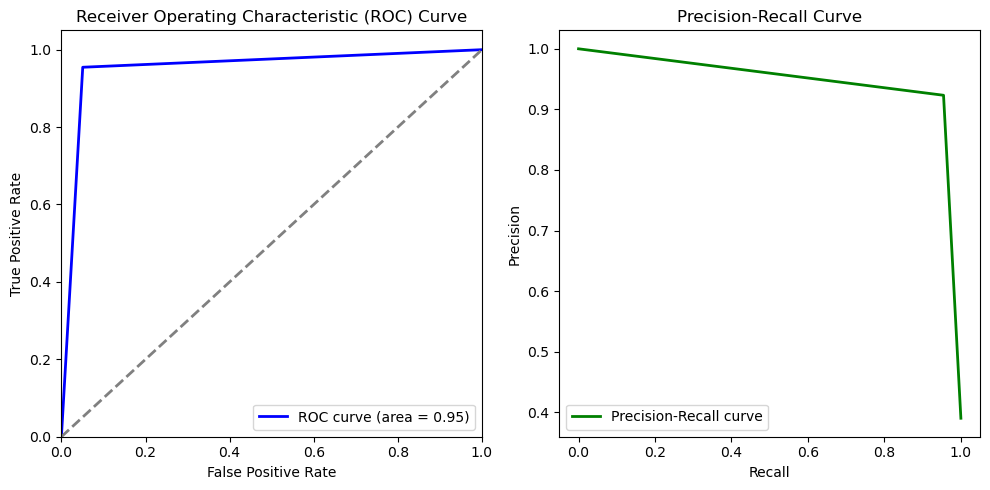

In [43]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))# for precision, recall, f1-score

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred1) 
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred1)

# Plot ROC curve
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2) 
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve') 
plt.legend(loc="lower left") 
plt.tight_layout() 
plt.show()

[[11660   598]
 [  383  7462]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     12258
           1       0.93      0.95      0.94      7845

    accuracy                           0.95     20103
   macro avg       0.95      0.95      0.95     20103
weighted avg       0.95      0.95      0.95     20103



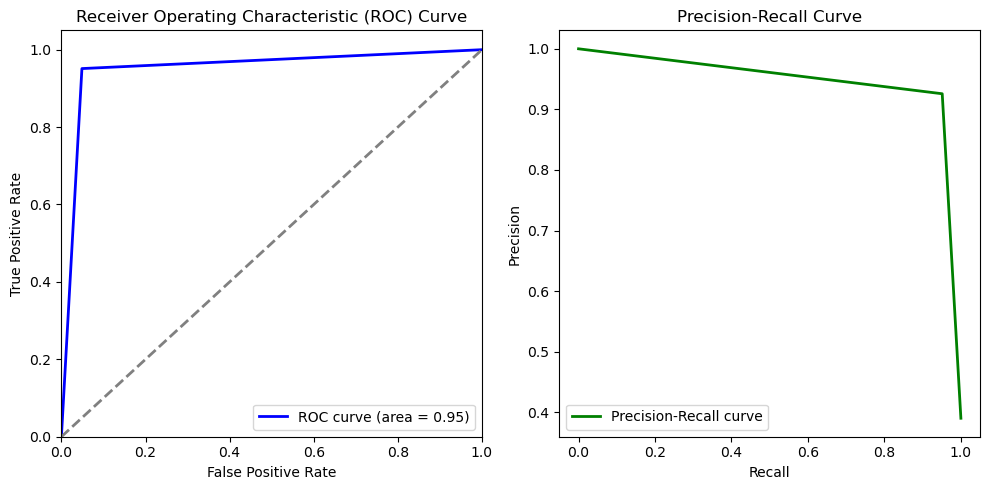

In [44]:
gnb.fit(X_train_smote,y_train_smote)
y_pred2 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))# for precision, recall, f1-score

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred2) 
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred2)

# Plot ROC curve
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2) 
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve') 
plt.legend(loc="lower left") 
plt.tight_layout() 
plt.show()

[[12112   146]
 [  245  7600]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12258
           1       0.98      0.97      0.97      7845

    accuracy                           0.98     20103
   macro avg       0.98      0.98      0.98     20103
weighted avg       0.98      0.98      0.98     20103



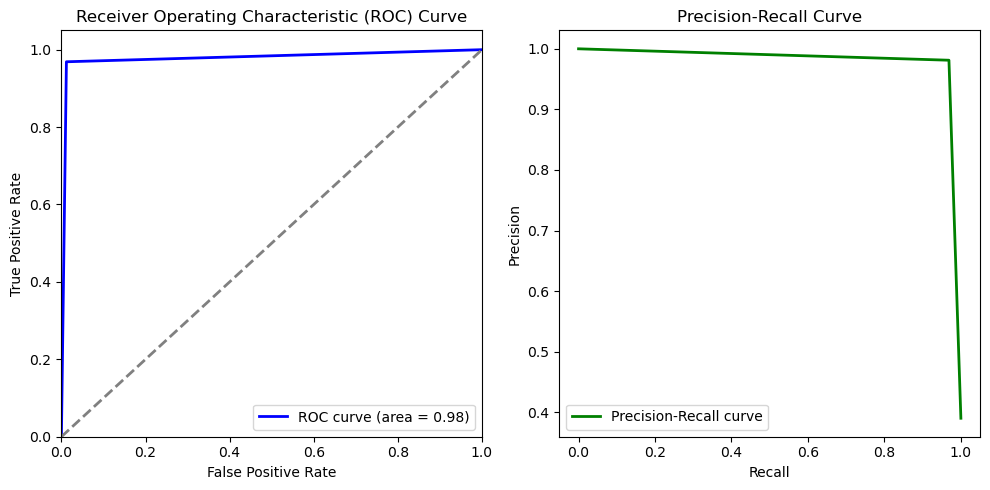

In [45]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))# for precision, recall, f1-score

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred3) 
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred3)

# Plot ROC curve
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2) 
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve') 
plt.legend(loc="lower left") 
plt.tight_layout() 
plt.show()

[[12112   146]
 [  247  7598]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12258
           1       0.98      0.97      0.97      7845

    accuracy                           0.98     20103
   macro avg       0.98      0.98      0.98     20103
weighted avg       0.98      0.98      0.98     20103



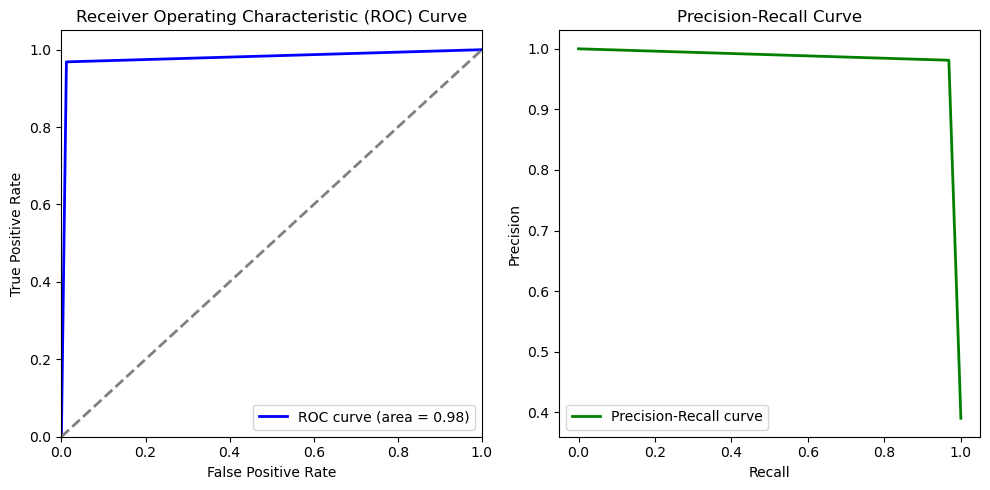

In [46]:
bnb.fit(X_train_smote,y_train_smote)
y_pred3 = bnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))# for precision, recall, f1-score

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred3) 
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred3)

# Plot ROC curve
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2) 
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve') 
plt.legend(loc="lower left") 
plt.tight_layout() 
plt.show()

[[11798   460]
 [  291  7554]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12258
           1       0.94      0.96      0.95      7845

    accuracy                           0.96     20103
   macro avg       0.96      0.96      0.96     20103
weighted avg       0.96      0.96      0.96     20103



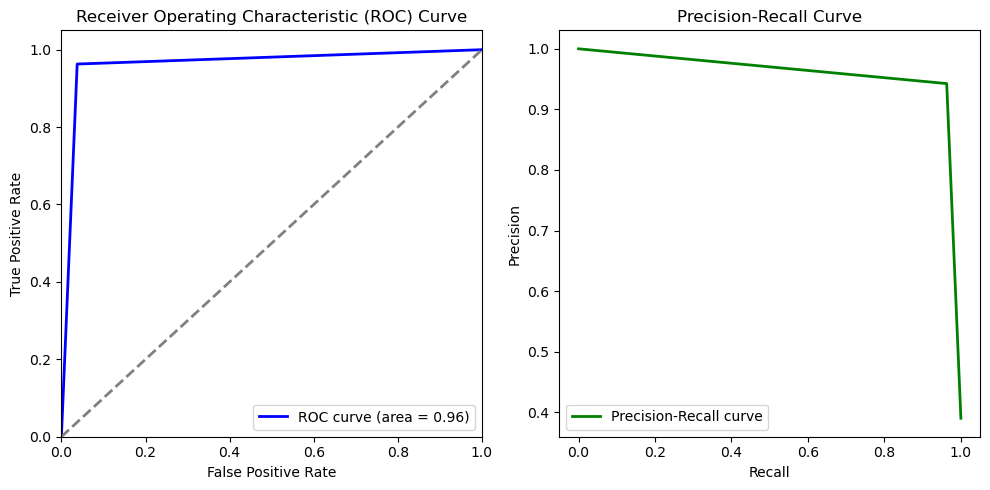

In [47]:
mnb.fit(X_train,y_train)
y_pred4 = mnb.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))# for precision, recall, f1-score

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred4) 
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred4)

# Plot ROC curve
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2) 
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve') 
plt.legend(loc="lower left") 
plt.tight_layout() 
plt.show()

[[11614   644]
 [  238  7607]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     12258
           1       0.92      0.97      0.95      7845

    accuracy                           0.96     20103
   macro avg       0.95      0.96      0.95     20103
weighted avg       0.96      0.96      0.96     20103



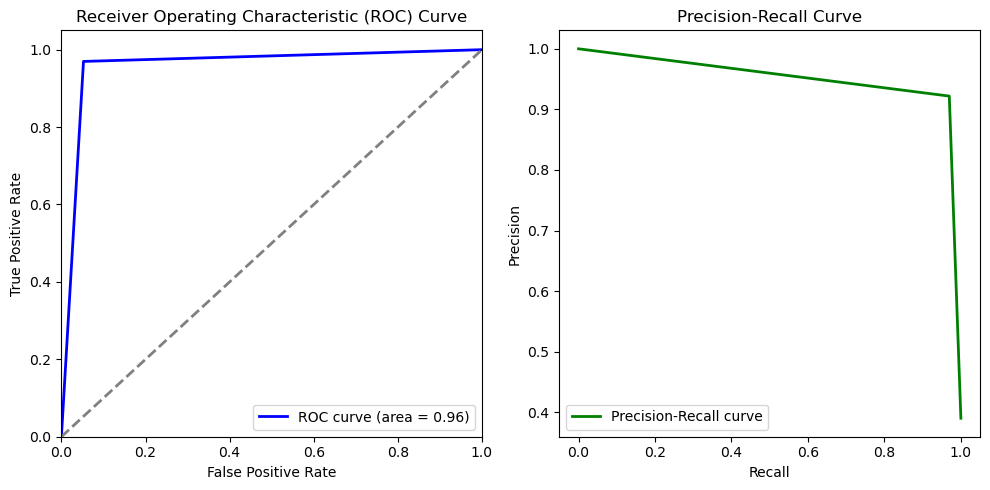

In [48]:
mnb.fit(X_train_smote,y_train_smote)
y_pred5 = mnb.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))# for precision, recall, f1-score

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred5) 
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred5)

# Plot ROC curve
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2) 
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve') 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve') 
plt.legend(loc="lower left") 
plt.tight_layout() 
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [50]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)

In [51]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'BNB': bnb,
    'MNB': mnb,
    'GNB': gnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc
}

In [52]:
from sklearn.metrics import confusion_matrix

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)


In [53]:
def train_classifier(clf,X_train_smote,y_train_smote,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    specificity = specificity_score(y_test,y_pred)
    
    return accuracy,precision,recall,f1,specificity

In [54]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9736357757548625,
 0.9712665893570416,
 0.9608667941363926,
 0.9660387030629245,
 0.9818077989884157)

In [55]:
train_classifier(svc,X_train_smote,y_train_smote,X_test,y_test)

(0.9736357757548625,
 0.9712665893570416,
 0.9608667941363926,
 0.9660387030629245,
 0.9818077989884157)

In [56]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1,current_specificity = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1-score - ",current_f1)
    print("Specificity - ",current_specificity)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)
    specificity_scores.append(current_specificity)

For  SVC
Accuracy -  0.9736357757548625
Precision -  0.9712665893570416
Recall -  0.9608667941363926
F1-score -  0.9660387030629245
Specificity -  0.9818077989884157
For  KN
Accuracy -  0.7836143859125504
Precision -  0.9893587230467656
Recall -  0.45035054174633526
F1-score -  0.6189558514365803
Specificity -  0.9968999836841247
For  BNB
Accuracy -  0.9805501666417947
Precision -  0.981151562096566
Recall -  0.9687699171446782
F1-score -  0.9749214290295684
Specificity -  0.9880894109969
For  MNB
Accuracy -  0.9626423916828334
Precision -  0.9426004492138758
Recall -  0.962906309751434
F1-score -  0.9526451856989722
Specificity -  0.9624734867025616
For  GNB
Accuracy -  0.9513505446948217
Precision -  0.9233140180002466
Recall -  0.9546207775653283
F1-score -  0.938706442717473
Specificity -  0.9492576276717246
For  DT
Accuracy -  0.8578819081729095
Precision -  0.9564421669106882
Recall -  0.6661567877629063
F1-score -  0.7853332331504996
Specificity -  0.9805841083374123
For  LR
Acc

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9453812863751679
Precision -  0.9640940982253405
Recall -  0.8933078393881453
F1-score -  0.927352123858674
Specificity -  0.9787077826725403


In [61]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
specificity_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1,current_specificity = train_classifier(clf, X_train_smote,y_train_smote,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1-score - ",current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)
    specificity_scores.append(current_specificity)

For  SVC
Accuracy -  0.9736357757548625
Precision -  0.9712665893570416
Recall -  0.9608667941363926
F1-score -  0.9660387030629245
For  KN
Accuracy -  0.7836143859125504
Precision -  0.9893587230467656
Recall -  0.45035054174633526
F1-score -  0.6189558514365803
For  BNB
Accuracy -  0.9805501666417947
Precision -  0.981151562096566
Recall -  0.9687699171446782
F1-score -  0.9749214290295684
For  MNB
Accuracy -  0.9626423916828334
Precision -  0.9426004492138758
Recall -  0.962906309751434
F1-score -  0.9526451856989722
For  GNB
Accuracy -  0.9513505446948217
Precision -  0.9233140180002466
Recall -  0.9546207775653283
F1-score -  0.938706442717473
For  DT
Accuracy -  0.8578819081729095
Precision -  0.9564421669106882
Recall -  0.6661567877629063
F1-score -  0.7853332331504996
For  LR
Accuracy -  0.9729891061035666
Precision -  0.9786313581541689
Recall -  0.9515615041427661
F1-score -  0.9649066115168358
For  RF
Accuracy -  0.9735860319355321
Precision -  0.97138437741686
Recall -  0.

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9453812863751679
Precision -  0.9640940982253405
Recall -  0.8933078393881453
F1-score -  0.927352123858674


In [62]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'f1':f1_scores,'specificity':specificity_scores,}).sort_values('Precision',ascending=False)

In [63]:
performance_df

,Algorithm,Accuracy,Precision,Recall,f1,specificity
1,KN,0.783614,0.989359,0.450351,0.618956,0.996900
2,BNB,0.980550,0.981152,0.968770,0.974921,0.988089
6,LR,0.972989,0.978631,0.951562,0.964907,0.986703
7,RF,0.973586,0.971384,0.960612,0.965968,0.981889
0,SVC,0.973636,0.971267,0.960867,0.966039,0.981808
8,AdaBoost,0.945381,0.964094,0.893308,0.927352,0.978708
5,DT,0.857882,0.956442,0.666157,0.785333,0.980584
3,MNB,0.962642,0.942600,0.962906,0.952645,0.962473
4,GNB,0.951351,0.923314,0.954621,0.938706,0.949258


In [64]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [65]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.783614
1,BNB,Accuracy,0.980550
2,LR,Accuracy,0.972989
3,RF,Accuracy,0.973586
4,SVC,Accuracy,0.973636
5,AdaBoost,Accuracy,0.945381
6,DT,Accuracy,0.857882
7,MNB,Accuracy,0.962642
8,GNB,Accuracy,0.951351
9,KN,Precision,0.989359


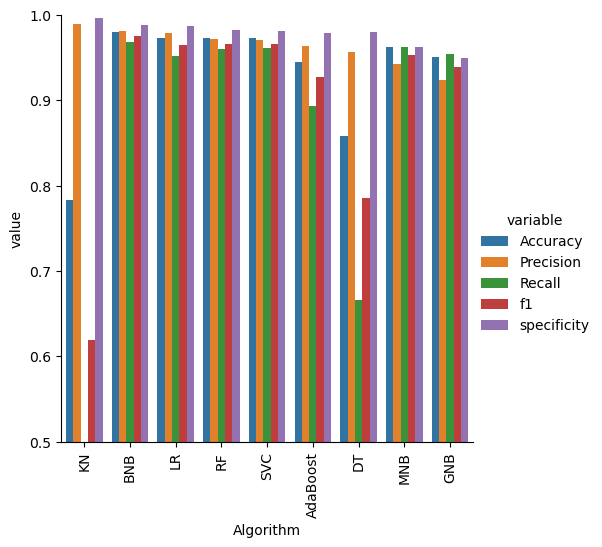

In [66]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [67]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores,'Recall_scaling':recall_scores,'f1_scaling':f1_scores}).sort_values('Precision_scaling',ascending=False)

new_df = performance_df.merge(temp_df,on='Algorithm')

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores,'Recall_num_chars':recall_scores,'f1_num_chars':f1_scores}).sort_values('Precision_num_chars',ascending=False)

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Recall,f1,specificity,Accuracy_scaling_x,Precision_scaling_x,Recall_scaling_x,f1_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Recall_scaling_y,f1_scaling_y,Accuracy_num_chars,Precision_num_chars,Recall_num_chars,f1_num_chars
0,KN,0.783614,0.989359,0.450351,0.618956,0.996900,0.783614,0.989359,0.450351,0.618956,0.783614,0.989359,0.450351,0.618956,0.783614,0.989359,0.450351,0.618956
1,BNB,0.980550,0.981152,0.968770,0.974921,0.988089,0.980550,0.981152,0.968770,0.974921,0.980550,0.981152,0.968770,0.974921,0.980550,0.981152,0.968770,0.974921
2,LR,0.972989,0.978631,0.951562,0.964907,0.986703,0.972989,0.978631,0.951562,0.964907,0.972989,0.978631,0.951562,0.964907,0.972989,0.978631,0.951562,0.964907
3,RF,0.973586,0.971384,0.960612,0.965968,0.981889,0.973586,0.971384,0.960612,0.965968,0.973586,0.971384,0.960612,0.965968,0.973586,0.971384,0.960612,0.965968
4,SVC,0.973636,0.971267,0.960867,0.966039,0.981808,0.973636,0.971267,0.960867,0.966039,0.973636,0.971267,0.960867,0.966039,0.973636,0.971267,0.960867,0.966039
5,AdaBoost,0.945381,0.964094,0.893308,0.927352,0.978708,0.945381,0.964094,0.893308,0.927352,0.945381,0.964094,0.893308,0.927352,0.945381,0.964094,0.893308,0.927352
6,DT,0.857882,0.956442,0.666157,0.785333,0.980584,0.857882,0.956442,0.666157,0.785333,0.857882,0.956442,0.666157,0.785333,0.857882,0.956442,0.666157,0.785333
7,MNB,0.962642,0.942600,0.962906,0.952645,0.962473,0.962642,0.942600,0.962906,0.952645,0.962642,0.942600,0.962906,0.952645,0.962642,0.942600,0.962906,0.952645
8,GNB,0.951351,0.923314,0.954621,0.938706,0.949258,0.951351,0.923314,0.954621,0.938706,0.951351,0.923314,0.954621,0.938706,0.951351,0.923314,0.954621,0.938706


In [60]:
# Voting Classifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
'''
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
'''
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('rf', rfc), ('lr',lrc )],voting='soft')

In [61]:
voting.fit(X_train_smote,y_train_smote)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear'))],
                 voting='soft')

In [62]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9756255285280804
Precision 0.9709280182810714


In [63]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('lr', lrc)]
final_estimator=RandomForestClassifier()

In [64]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [65]:
clf.fit(X_train_smote,y_train_smote)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.972143461174949
Precision 0.9610992596310703


In [60]:
import pickle
pickle.dump(tfidf,open('vectorizer_super.pkl','wb'))
pickle.dump(bnb,open('model_bnb_super.pkl','wb'))

In [68]:
pickle.dump(clf,open('model_stacking_super.pkl','wb'))

In [61]:
# Load the vectorizer and model
with open('vectorizer_super.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('model_bnb_super.pkl', 'rb') as f:
    model = pickle.load(f)

# New text to predict
new_text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr..."]

# Transform the new text using the vectorizer
new_text_vectorized = vectorizer.transform(new_text)

# Convert sparse matrix to dense format
new_text_vectorized_dense = new_text_vectorized.toarray()

# Make predictions using the model
prediction = model.predict(new_text_vectorized_dense)
print("Prediction:", prediction)


Prediction: [1.]


In [16]:
import pandas as pd
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch

# Convert the data to a Hugging Face dataset
dataset = Dataset.from_pandas(df)

# Split the dataset into training and validation sets
dataset = dataset.train_test_split(test_size=0.2)

# Load the tokenizer and model
model_name = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

# Save the model and tokenizer
model.save_pretrained("spam_classifier_gpt")
tokenizer.save_pretrained("spam_classifier_gpt")

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


AttributeError: 'FloatProgress' object has no attribute 'style'